In [16]:
from sc23_utils import *

%load_ext autoreload
%autoreload 2

def plot_compress_res(
    data,
    cats,
    colormap,
    linestyles,
    linewidths,
    markerstyles,
    zorders,
    prefix,
    title,
    block,
    height=2.8, 
    yticks=None
):
    fig, ax = plt.subplots(figsize=(5.5, height), dpi=100)
    for c, color, ls, lw, ms, zo in zip(
        cats, colormap, linestyles, linewidths, markerstyles, zorders
    ):
        if block is not None and c in block:
            continue
        x = data[c + "-cr"]
        y = data[c + "-psnr"]
        ax.plot(
            x,
            y,
            color=color,
            lw=lw,
            ls=ls,
            marker=ms,
            markersize=4.5,
            markerfacecolor="white",
            markeredgewidth=lw,
            markeredgecolor=color,
            label=c,
            zorder=zo,
        )
    ax.legend()
    ax.set_ylabel("PSNR"), ax.set_xlabel("Compression Ratio")
    ax.xaxis.set_major_formatter(fmt), ax.yaxis.set_major_formatter(fmt)

    ax.grid(color="lightgray", lw=0.5, ls=":")
    ax.set_title(title)
    sns.despine()

    fig.tight_layout()
    date, time = date_time_prefix()
    ofname = f"{date}_{prefix}_{title.lower()}_{time}"
    fig.savefig(ofname + ".pdf")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
!rm *coarse*.pdf
!rm *fine*.pdf

# SZ2

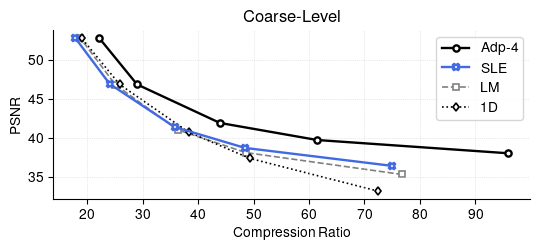

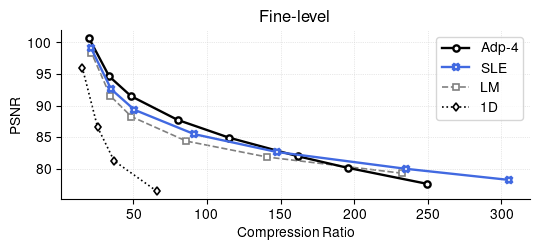

In [14]:
colormap = ['black', 'royalblue','darkgray', 'gray', 'black']
linestyles = ['-', '-', '--', '--', ':']
linewidths = [1.7, 1.7, 1.2, 1.2, 1.2]
markerstyles = ['o', 'X', 'o', 's', 'd']
zorders = [10,19,1,1,1]
plot_compress_res(cr_psnr["sz2-coarse"], sz2_cats, colormap, linestyles, linewidths, markerstyles, zorders, "sz2", "Coarse-Level", ["Adp-8"])
plot_compress_res(cr_psnr["sz2-fine"], sz2_cats, colormap, linestyles, linewidths, markerstyles, zorders, "sz2", "Fine-level", ["Adp-8"])

# SZ3

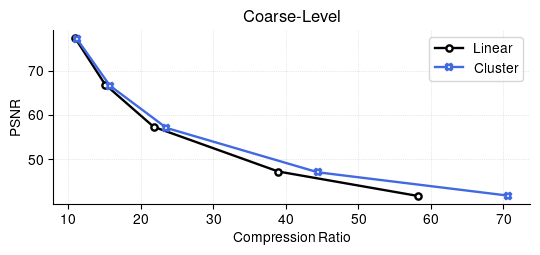

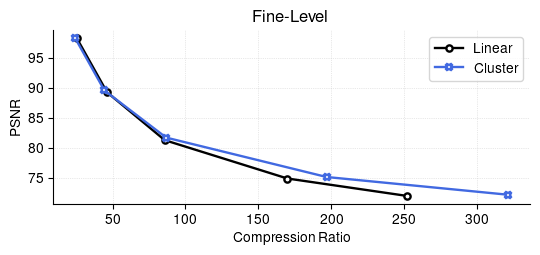

In [20]:
plot_compress_res(cr_psnr["sz3-coarse"], sz3_cats, colormap, linestyles, linewidths, markerstyles, zorders, "sz3", "Coarse-Level", ["Adp-8"], 2.65)
plot_compress_res(cr_psnr["sz3-fine"], sz3_cats, colormap, linestyles, linewidths, markerstyles, zorders, "sz3", "Fine-Level", None, 2.65)